In [86]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data
from portfolios_toolkit import markowitz_weights

### Building a Portfolio ###

In [87]:
stocks_tickers = get_tickers("6.1a")

stocks_tickers

['AAPL', 'JNJ', 'JPM', 'AMZN', 'XOM', 'UNP', 'PLD']

In [88]:
sectors_tickers = get_tickers("6.1b")

sectors_tickers

['XLK', 'XLV', 'XLF', 'XLY', 'XLE', 'XLI', 'XLRE']

In [89]:
# DataFrame to store everything
stock_returns_df = pd.DataFrame()

for ticker in stocks_tickers:
    df_stock = get_market_data(
        ticker=ticker, 
        start_date='2020-01-01', 
        end_date='2026-01-01', 
        returns=True
    )
    
    returns = df_stock['returns'].rename(ticker)
    
    stock_returns_df = pd.concat([stock_returns_df, returns], axis=1)

In [90]:
stock_returns_df

,AAPL,JNJ,JPM,AMZN,XOM,UNP,PLD
2020-01-03 00:00:00,-0.009770,-0.011645,-0.013284,-0.012213,-0.008072,-0.007103,0.011137
2020-01-06 00:00:00,0.007937,-0.001248,-0.000795,0.014776,0.007649,-0.008601,-0.003923
2020-01-07 00:00:00,-0.004714,0.006088,-0.017147,0.002089,-0.008218,-0.007608,-0.006422
2020-01-08 00:00:00,0.015958,-0.000138,0.007771,-0.007839,-0.015195,0.010891,0.005411
2020-01-09 00:00:00,0.021019,0.002962,0.003645,0.004788,0.007626,-0.005124,0.000113
...,...,...,...,...,...,...,...
2025-06-18 00:00:00,0.004793,-0.010887,0.016340,-0.010764,-0.007131,0.006417,-0.000095
2025-06-20 00:00:00,0.022235,-0.006256,0.003789,-0.013406,0.013252,0.002250,0.005788
2025-06-23 00:00:00,0.002484,0.010163,0.011821,-0.005835,-0.026145,0.015032,0.013533
2025-06-24 00:00:00,-0.005973,0.005733,0.010688,0.020417,-0.030900,0.008947,0.009291


In [91]:
# Portfolio's Expected Returns
expected_returns = stock_returns_df.mean()
expected_returns.name = 'mean_returns'

expected_returns

AAPL    0.000740
JNJ     0.000144
JPM     0.000621
AMZN    0.000583
XOM     0.000498
UNP     0.000245
PLD     0.000232
Name: mean_returns, dtype: float64

In [92]:
# Covariance Matrix
covariance_matrix = stock_returns_df.cov()

covariance_matrix

,AAPL,JNJ,JPM,AMZN,XOM,UNP,PLD
AAPL,0.000421,0.000087,0.000181,0.000283,0.000135,0.000167,0.000223
JNJ,0.000087,0.000157,0.000097,0.000042,0.000079,0.000088,0.000112
JPM,0.000181,0.000097,0.000412,0.000141,0.000246,0.000225,0.000202
AMZN,0.000283,0.000042,0.000141,0.000518,0.000076,0.000120,0.000193
XOM,0.000135,0.000079,0.000246,0.000076,0.000456,0.000179,0.000138
UNP,0.000167,0.000088,0.000225,0.000120,0.000179,0.000300,0.000197
PLD,0.000223,0.000112,0.000202,0.000193,0.000138,0.000197,0.000404


In [93]:
# Correlation Matrix
correlation_matrix = stock_returns_df.corr()

correlation_matrix

,AAPL,JNJ,JPM,AMZN,XOM,UNP,PLD
AAPL,1.000000,0.339295,0.435560,0.605862,0.307635,0.468845,0.541138
JNJ,0.339295,1.000000,0.380945,0.148521,0.296413,0.407693,0.444272
JPM,0.435560,0.380945,1.000000,0.305080,0.566994,0.639370,0.496547
AMZN,0.605862,0.148521,0.305080,1.000000,0.156133,0.304324,0.422978
XOM,0.307635,0.296413,0.566994,0.156133,1.000000,0.483415,0.321103
UNP,0.468845,0.407693,0.639370,0.304324,0.483415,1.000000,0.565743
PLD,0.541138,0.444272,0.496547,0.422978,0.321103,0.565743,1.000000


In [94]:
# Obtain Weights
p_weights = markowitz_weights(
    expected_returns, 
    covariance_matrix,
    0.0010
)

In [95]:
# Create a Portfolio Weights DF
portfolio_weights = pd.Series(
    p_weights,
    index = stock_returns_df.columns,
    name = 'weights'
)

portfolio_weights

AAPL    0.795208
JNJ     0.028233
JPM     0.645835
AMZN    0.172263
XOM     0.229186
UNP    -0.450005
PLD    -0.420719
Name: weights, dtype: float64

In [96]:
# Portfolio Returns
portfolio_returns = stock_returns_df @ p_weights
portfolio_returns.name = 'portfolio_returns'

portfolio_returns

2020-01-03   -0.022120
2020-01-06    0.015582
2020-01-07   -0.010049
2020-01-08    0.005694
2020-01-09    0.023983
                ...   
2025-06-18    0.007721
2025-06-20    0.017233
2025-06-23   -0.009558
2025-06-24   -0.009186
2025-06-25    0.024106
Name: portfolio_returns, Length: 1376, dtype: float64

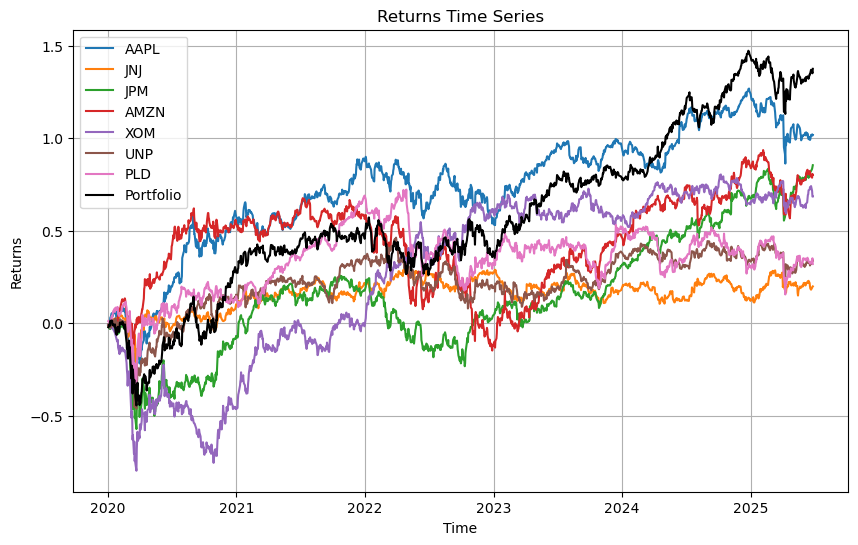

In [97]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(stock_returns_df.cumsum(), label=stock_returns_df.columns, alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', color='black', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

### Getting a Benchmark: Using a Hypothetical Portfolio ###

In [98]:
# DataFrame to store everything
sector_returns_df = pd.DataFrame()

for ticker in sectors_tickers:
    df_stock = get_market_data(
        ticker=ticker, 
        start_date='2020-01-01', 
        end_date='2026-01-01', 
        returns=True
    )
    
    returns = df_stock['returns'].rename(ticker)
    
    sector_returns_df = pd.concat([sector_returns_df, returns], axis=1)

In [99]:
sector_returns_df

,XLK,XLV,XLF,XLY,XLE,XLI,XLRE
2020-01-03 00:00:00,-0.011307,-0.008753,-0.010674,-0.008547,-0.002976,-0.001930,0.007299
2020-01-06 00:00:00,0.002379,0.006204,-0.000651,0.002778,0.007751,0.000362,0.000260
2020-01-07 00:00:00,-0.000432,-0.001965,-0.006529,-0.001586,-0.002632,-0.002053,-0.010966
2020-01-08 00:00:00,0.010644,0.006470,0.006529,0.003012,-0.016609,0.003380,0.004976
2020-01-09 00:00:00,0.011272,0.004291,0.006164,0.005288,0.007342,0.004209,-0.000261
...,...,...,...,...,...,...,...
2025-06-18 00:00:00,0.001201,-0.001725,-0.000398,0.000475,-0.006563,-0.002388,0.001914
2025-06-20 00:00:00,-0.004438,-0.004815,0.002784,0.001187,0.010166,0.001124,-0.000239
2025-06-23 00:00:00,0.011337,0.001439,0.012514,0.019627,-0.025614,0.013450,0.014489
2025-06-24 00:00:00,0.017792,0.012183,0.014844,0.005535,-0.013104,0.008307,0.004744


In [100]:
# Get the returns of each stock of our portfolio but in the IWY
bench_weights = pd.Series(
    [31.6, 9.6, 14.3, 10.6, 3.0, 8.7, 2.1],
    index = sector_returns_df.columns,
    name = 'weights'
)

bench_weights = bench_weights/100

bench_weights

XLK     0.316
XLV     0.096
XLF     0.143
XLY     0.106
XLE     0.030
XLI     0.087
XLRE    0.021
Name: weights, dtype: float64

In [101]:
# Normalized
norm_bench_weights = bench_weights/bench_weights.sum()

norm_bench_weights

XLK     0.395494
XLV     0.120150
XLF     0.178974
XLY     0.132666
XLE     0.037547
XLI     0.108886
XLRE    0.026283
Name: weights, dtype: float64

In [102]:
# Build the Benchmark Returns
benchmark_returns = sector_returns_df @ norm_bench_weights
benchmark_returns.name = 'benchmark_returns'

benchmark_returns

2020-01-03   -0.008698
2020-01-06    0.002276
2020-01-07   -0.002397
2020-01-08    0.006430
2020-01-09    0.007505
                ...   
2025-06-18   -0.000197
2025-06-20   -0.001180
2025-06-23    0.010384
2025-06-24    0.012429
2025-06-25   -0.001669
Name: benchmark_returns, Length: 1376, dtype: float64

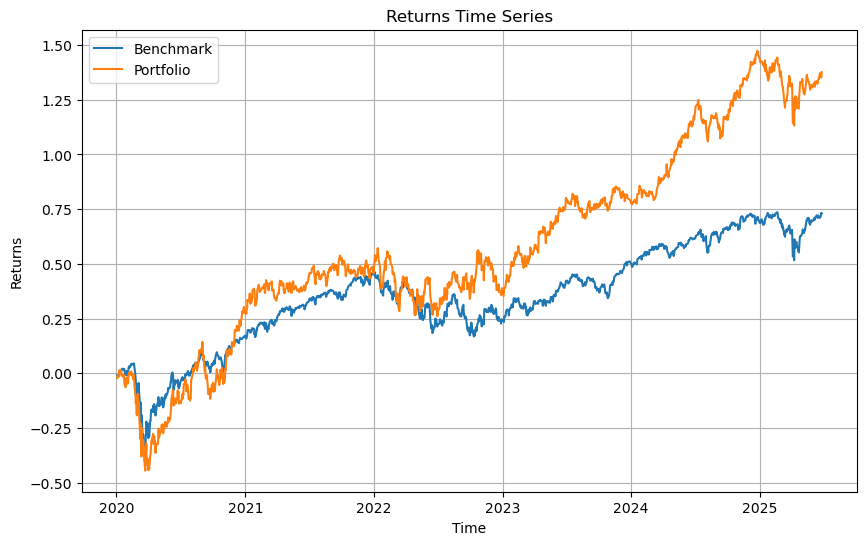

In [103]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(benchmark_returns.cumsum(), label='Benchmark', alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

In [104]:
# Calculate the Mean Returns
portfolio_total_returns = portfolio_returns.cumsum().iloc[-1]
benchmark_total_returns = benchmark_returns.cumsum().iloc[-1]

print(portfolio_total_returns)
print(benchmark_total_returns)

1.3759999999999992
0.7313221378221485


In [105]:
# Calculate the Excess Returns
excess_returns = portfolio_total_returns - benchmark_total_returns

excess_returns

0.6446778621778507

In [106]:
# Sectors List
sectors_list = [
    "Technology",
    "Health",
    "Financials",
    "Consumer",
    "Energy",
    "Industrials",
    "Real_Estate"
]

In [107]:
stock_returns_df.columns = sectors_list
sector_returns_df.columns = sectors_list

In [108]:
portfolio_weights.index = sectors_list
norm_bench_weights.index = sectors_list

The calculations of the effects in the Brinson-Fachler Model can be reviewed in the first section of this module's PDF. The mathematical derivations and explanations are provided there.

In [141]:
# Create a Comparison DF
comparison_df = pd.DataFrame(index = sectors_list)
comparison_df['portfolio_weights'] = portfolio_weights
comparison_df['benchmark_weights'] = norm_bench_weights
comparison_df['stocks_returns'] = stock_returns_df.cumsum().iloc[-1]
comparison_df['sector_returns'] = sector_returns_df.cumsum().iloc[-1]
comparison_df['portfolio_returns'] = comparison_df['portfolio_weights'] * comparison_df['stocks_returns']
comparison_df['benchmark_returns'] = comparison_df['benchmark_weights'] * comparison_df['sector_returns']

# The Alphas (Portfolio - Benchmark)
comparison_df['alphas'] = comparison_df['stocks_returns'] - comparison_df['sector_returns']
comparison_df['weights_diff'] = comparison_df['portfolio_weights'] - comparison_df['benchmark_weights']

comparison_df

,portfolio_weights,benchmark_weights,stocks_returns,sector_returns,portfolio_returns,benchmark_returns,alphas,weights_diff
Technology,0.795208,0.395494,1.018177,1.028910,0.809662,0.406928,-0.010733,0.399713
Health,0.028233,0.120150,0.198785,0.356301,0.005612,0.042810,-0.157517,-0.091918
Financials,0.645835,0.178974,0.854437,0.608656,0.551825,0.108933,0.245781,0.466862
Consumer,0.172263,0.132666,0.801869,0.562930,0.138132,0.074682,0.238939,0.039597
Energy,0.229186,0.037547,0.685111,0.569367,0.157018,0.021378,0.115744,0.191639
Industrials,-0.450005,0.108886,0.337254,0.638373,-0.151766,0.069510,-0.301119,-0.558891
Real_Estate,-0.420719,0.026283,0.319653,0.269430,-0.134484,0.007081,0.050223,-0.447002


In [142]:
# Check the sum
comparison_df.sum()

portfolio_weights    1.000000
benchmark_weights    1.000000
stocks_returns       4.215285
sector_returns       4.033967
portfolio_returns    1.376000
benchmark_returns    0.731322
alphas               0.181318
weights_diff         0.000000
dtype: float64

In [143]:
# Calculate the Brinson-Fachler Allocation Effect
allocation_effect = comparison_df['weights_diff'] * (comparison_df['sector_returns'] - comparison_df['benchmark_returns'].sum())
allocation_effect.name = 'allocation_effect'

allocation_effect

Technology     0.118950
Health         0.034471
Financials    -0.057268
Consumer      -0.006668
Energy        -0.031037
Industrials    0.051948
Real_Estate    0.206467
Name: allocation_effect, dtype: float64

In [158]:
# Calculate the Brinson-Fachler Selection Effect
selection_effect = comparison_df['benchmark_weights'] * comparison_df['alphas']
selection_effect.name = 'selection_effect'

selection_effect

Technology    -0.004245
Health        -0.018926
Financials     0.043988
Consumer       0.031699
Energy         0.004346
Industrials   -0.032788
Real_Estate    0.001320
Name: selection_effect, dtype: float64

In [159]:
# Calculate the Brinson-Fachler Intersection Effect
interaction_effect = comparison_df['weights_diff'] * comparison_df['alphas']
interaction_effect.name = 'interaction_effect'

interaction_effect

Technology    -0.004290
Health         0.014479
Financials     0.114746
Consumer       0.009461
Energy         0.022181
Industrials    0.168293
Real_Estate   -0.022450
Name: interaction_effect, dtype: float64

In [160]:
# Calculate the Total Effect
bf_total_attribution = (
        allocation_effect + 
        selection_effect +
        interaction_effect
)

bf_total_attribution.name = 'bf_total_attribution'

bf_total_attribution

Technology     0.110415
Health         0.030024
Financials     0.101466
Consumer       0.034492
Energy        -0.004510
Industrials    0.187454
Real_Estate    0.185337
Name: bf_total_attribution, dtype: float64

In [161]:
# Show
brinson_fachler_df = pd.DataFrame({
    'allocation': allocation_effect,
    'selection': selection_effect,
    'interaction': interaction_effect,
    'total': bf_total_attribution
})

brinson_fachler_df

,allocation,selection,interaction,total
Technology,0.118950,-0.004245,-0.004290,0.110415
Health,0.034471,-0.018926,0.014479,0.030024
Financials,-0.057268,0.043988,0.114746,0.101466
Consumer,-0.006668,0.031699,0.009461,0.034492
Energy,-0.031037,0.004346,0.022181,-0.004510
Industrials,0.051948,-0.032788,0.168293,0.187454
Real_Estate,0.206467,0.001320,-0.022450,0.185337


In [162]:
brinson_fachler_df.sum().round(6)

allocation     0.316863
selection      0.025395
interaction    0.302420
total          0.644678
dtype: float64

In [163]:
# Divide the DataFrame by the Excess Return
norm_brinson_fachler_df = (brinson_fachler_df/brinson_fachler_df['total'].sum()) * 100

norm_brinson_fachler_df

,allocation,selection,interaction,total
Technology,18.451058,-0.658431,-0.665455,17.127172
Health,5.347015,-2.935677,2.245859,4.657197
Financials,-8.883213,6.823300,17.798908,15.738995
Consumer,-1.034288,4.917033,1.467595,5.350340
Energy,-4.814321,0.674110,3.440641,-0.699569
Industrials,8.058030,-5.085908,26.104977,29.077099
Real_Estate,32.026346,0.204755,-3.482334,28.748767


In [164]:
norm_brinson_fachler_df.sum().round(2)

allocation      49.15
selection        3.94
interaction     46.91
total          100.00
dtype: float64

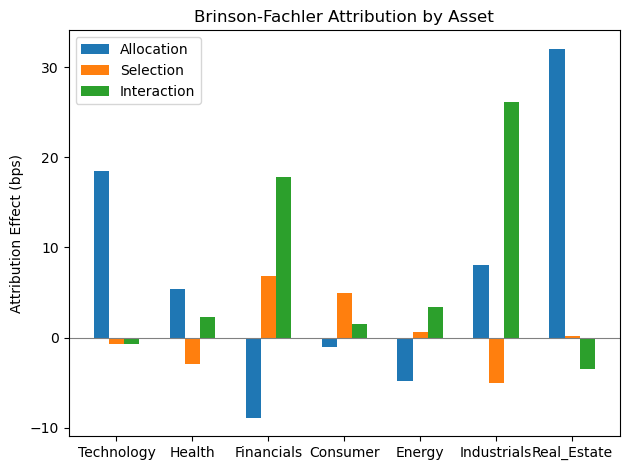

In [165]:
# Plotting individual attribution effects per asset
fig, ax = plt.subplots()

bar_width = 0.2
x = np.arange(len(norm_brinson_fachler_df))

# Plot each component
ax.bar(x - bar_width, norm_brinson_fachler_df["allocation"], width=bar_width, label="Allocation")
ax.bar(x, norm_brinson_fachler_df["selection"], width=bar_width, label="Selection")
ax.bar(x + bar_width, norm_brinson_fachler_df["interaction"], width=bar_width, label="Interaction")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(norm_brinson_fachler_df.index)
ax.set_ylabel("Attribution Effect (bps)")
ax.set_title("Brinson-Fachler Attribution by Asset")
ax.legend()
ax.axhline(0, color="gray", linewidth=0.8)

plt.tight_layout()
plt.show()

### Brinson-Hood-Beebower Model ###

To understand the differences between the BHB Model and the Brinson-Fachler Model, the reader can refer to Section 2 of this module’s PDF. There, you will find a detailed explanation of why the BHB Model is also used.

In [166]:
# Let us define the portfolios

# Quadrant IV Portfolio
pure_active_portfolio = stock_returns_df @ portfolio_weights
pure_active_portfolio.name = 'pure_active_portfolio_returns'

pure_active_portfolio 

2020-01-03   -0.022120
2020-01-06    0.015582
2020-01-07   -0.010049
2020-01-08    0.005694
2020-01-09    0.023983
                ...   
2025-06-18    0.007721
2025-06-20    0.017233
2025-06-23   -0.009558
2025-06-24   -0.009186
2025-06-25    0.024106
Name: pure_active_portfolio_returns, Length: 1376, dtype: float64

In [167]:
# Quadrant I Portfolio
pure_pasive_portfolio = sector_returns_df @ norm_bench_weights
pure_pasive_portfolio.name = 'pure_pasive_portfolio_returns'

pure_pasive_portfolio

2020-01-03   -0.008698
2020-01-06    0.002276
2020-01-07   -0.002397
2020-01-08    0.006430
2020-01-09    0.007505
                ...   
2025-06-18   -0.000197
2025-06-20   -0.001180
2025-06-23    0.010384
2025-06-24    0.012429
2025-06-25   -0.001669
Name: pure_pasive_portfolio_returns, Length: 1376, dtype: float64

In [168]:
# Quadrant II Portfolio (Active Allocation Passive Selection)
aaps_portfolio = sector_returns_df @ portfolio_weights
aaps_portfolio.name = 'aaps_portfolio_returns'

aaps_portfolio

2020-01-03   -0.020489
2020-01-06    0.003630
2020-01-07    0.000045
2020-01-08    0.005962
2020-01-09    0.013875
                ...   
2025-06-18   -0.000504
2025-06-20    0.000261
2025-06-23    0.002500
2025-06-24    0.016295
2025-06-25    0.009758
Name: aaps_portfolio_returns, Length: 1376, dtype: float64

In [169]:
# Quadrant III Portfolio (Passive Allocation Active Selection)
paas_portfolio = stock_returns_df @ norm_bench_weights
paas_portfolio.name = 'paas_portfolio_returns'

paas_portfolio

2020-01-03   -0.010045
2020-01-06    0.004054
2020-01-07   -0.005230
2020-01-08    0.007403
2020-01-09    0.009687
                ...   
2025-06-18    0.002512
2025-06-20    0.007837
2025-06-23    0.004556
2025-06-24    0.003006
2025-06-25    0.000896
Name: paas_portfolio_returns, Length: 1376, dtype: float64

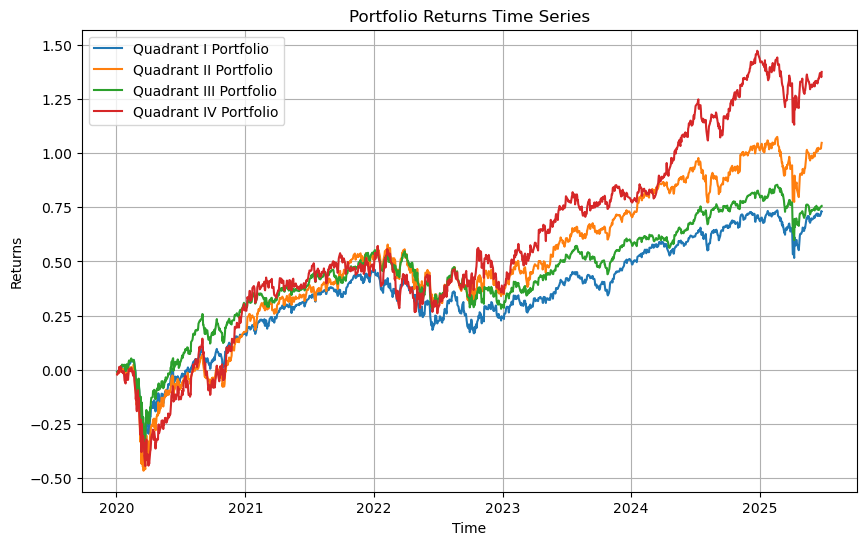

In [170]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(pure_pasive_portfolio.cumsum(), label='Quadrant I Portfolio', alpha=1)
plt.plot(aaps_portfolio.cumsum(), label='Quadrant II Portfolio', alpha=1)
plt.plot(paas_portfolio.cumsum(), label='Quadrant III Portfolio', alpha=1)
plt.plot(pure_active_portfolio.cumsum(), label='Quadrant IV Portfolio', alpha=1)

# Config
plt.title('Portfolio Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

In [172]:
# Now calculate the cumulative returns
quadrant_1_return = pure_pasive_portfolio.cumsum().iloc[-1]
quadrant_2_return = aaps_portfolio.cumsum().iloc[-1]
quadrant_3_return = paas_portfolio.cumsum().iloc[-1]
quadrant_4_return = pure_active_portfolio.cumsum().iloc[-1]

print(f'Quadrant 1 Return: {quadrant_1_return}')
print(f'Quadrant 2 Return: {quadrant_2_return}')
print(f'Quadrant 3 Return: {quadrant_3_return}')
print(f'Quadrant 4 Return: {quadrant_4_return}')

Quadrant 1 Return: 0.7313221378221485
Quadrant 2 Return: 1.04818534667895
Quadrant 3 Return: 0.7567171711508749
Quadrant 4 Return: 1.3759999999999992


In [173]:
# The Excess Returns (we calculated it previously)
excess_returns

0.6446778621778507

In [184]:
# Market Timing Effect:
market_timing_effect = quadrant_2_return - quadrant_1_return

print(f'Market Timing Effect: {market_timing_effect}')

Market Timing Effect: 0.3168632088568014


In [185]:
# Security Selection Effect:
security_selection_effect = quadrant_3_return - quadrant_1_return

print(f'Security Selection Effect: {security_selection_effect}')

Security Selection Effect: 0.02539503332872639


In [186]:
# Other Effects:
other_effects = quadrant_4_return + quadrant_1_return - quadrant_2_return - quadrant_3_return

print(f'Other Effects: {other_effects}')

Other Effects: 0.30241961999232303


In [187]:
# Total Effect (must be equal to the excess returns)
total_effect = market_timing_effect + security_selection_effect + other_effects

print(f'Total Effect: {total_effect}')

Total Effect: 0.6446778621778508


In [180]:
# Check that both models provide the same results
brinson_fachler_df.sum()

allocation     0.316863
selection      0.025395
interaction    0.302420
total          0.644678
dtype: float64